In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import data
df = pd.read_csv('df_nontemporal.csv')
df.fillna(0,inplace=True)

In [2]:
#Split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X = df.iloc[:,np.arange(4,len(df.columns)).tolist()]
t = df['mood']

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.2, random_state = 32)

#Initiate model
rf = RandomForestRegressor(n_estimators = 50, random_state = 32)
rf.fit(X_train, t_train)
t_pred=rf.predict(X_test)
MSE=mean_squared_error(t_test,t_pred)
print(MSE)

0.05680522678328897


In [3]:
plt.figure()
plt.plot(MSE_test,':',label='test')
plt.plot(MSE_train,'--',label='train')
plt.legend()

NameError: name 'MSE_test' is not defined

<Figure size 432x288 with 0 Axes>

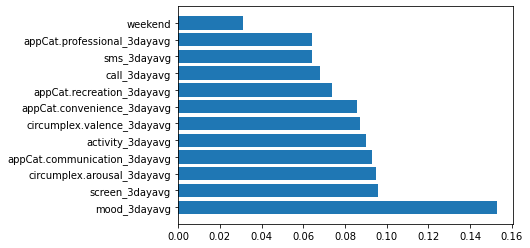

In [6]:
#Feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importances.index,feature_importances.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig('rf_importance.pdf')

In [7]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 60, 80, 100],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [2, 4],
    'n_estimators': [200, 500, 1000]
}

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = RandomForestRegressor(random_state=32), param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 10)

rf_grid.fit(X_train, t_train.values.ravel())
print(rf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

{'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}


In [8]:
t_pred=rf_grid.best_estimator_.predict(X_test)
MSE=mean_squared_error(t_test.values.ravel(),t_pred)
print(MSE)

0.05535670772742815


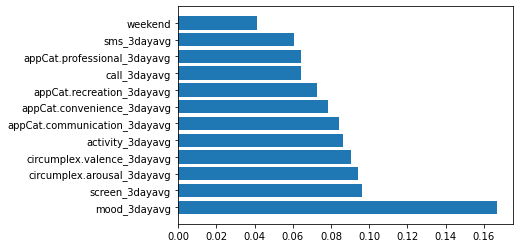

In [10]:
#Feature importance
rf2 = RandomForestRegressor(n_estimators = 1000, max_depth=40,min_samples_leaf=4,min_samples_split=2,bootstrap=True, random_state = 32)
rf2.fit(X_train, t_train)

feature_importances2 = pd.DataFrame(rf2.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importances2.index,feature_importances2.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig('rfgrid_importance.pdf')

In [11]:
feature_importances.importance.values.tolist()

[0.15282683257953064,
 0.09570045744152807,
 0.09490578466959794,
 0.0928023890430399,
 0.09005260759344359,
 0.08697016359344842,
 0.0855954088254602,
 0.07388885633932733,
 0.06796554194952803,
 0.06413140097655289,
 0.06402584552160855,
 0.031134711466934452]

In [12]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# simple fit
AdaB = AdaBoostRegressor(
    base_estimator = DecisionTreeRegressor(max_depth=2),
    n_estimators=50, 
    learning_rate=1.0, random_state=32
)
AdaB.fit(X_train,t_train.values.ravel())


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=2,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [13]:
t_pred=AdaB.predict(X_test)
MSE=mean_squared_error(t_test.values.ravel(),t_pred)
print(MSE)

0.05910217124902568


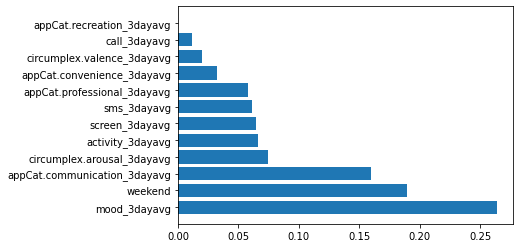

In [15]:
#Feature importance
feature_importances3 = pd.DataFrame(AdaB.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importances3.index,feature_importances3.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig('ad_importance.pdf')

In [16]:
# sample param_grid for gridsearch later
# note the base_estimator__ to tune the decision tree hyper parameters
param_grid = {
    "base_estimator__max_depth" : [1,2,5,None],
    "n_estimators": [1,2,10,20,50,100,500],
    "learning_rate": [1, 0.5, 0.2, 0.1],
}
AdaB_grid = GridSearchCV(estimator = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=32), param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 5)
AdaB_grid.fit(X_train, t_train.values.ravel())
print(AdaB_grid.best_params_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:   18.0s


{'base_estimator__max_depth': 5, 'learning_rate': 0.2, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:   24.5s finished


In [17]:
t_pred=AdaB_grid.best_estimator_.predict(X_test)
MSE=mean_squared_error(t_test.values.ravel(),t_pred)
print(MSE)

0.05766092122540482


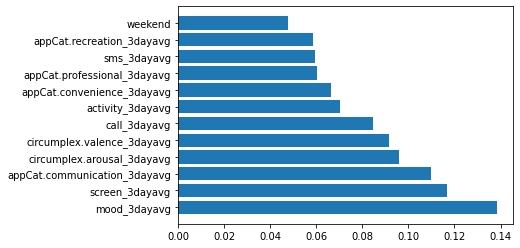

In [19]:
#Feature importance
ad2 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),n_estimators = 50, random_state = 32,learning_rate=0.2)
ad2.fit(X_train, t_train)

feature_importances4 = pd.DataFrame(ad2.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importances4.index,feature_importances4.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig('adgrid_importance.pdf')